# Ghana Agricultural Sector: Statistical Analysis
## Correlation and Regression Analysis Validating Power BI Insights

**Author:** Samuel Agondeze Kisoke  
**Organization:** Amalitech Ghana (Data Analytics Internship)  
**Date:** October - December 2025

This notebook performs statistical validation of agricultural trends observed in Power BI dashboards using Python. Analysis includes correlation matrices for production volumes, crop yields, area harvested, and GDP contributions, plus OLS regression modeling to quantify relationships between agricultural output and national economic performance.

**Data Sources:** FAOStat (1961-2023), Ghana Statistical Service (2006-2024)

## Setup and Library Imports

Import required libraries for data manipulation, visualization, and statistical modeling. Using Google Colab environment with Google Drive integration for data access.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis 1: Production Volume Correlations

**Objective:** Examine relationships between production volumes of cocoa, maize, rice, and yam over 63 years (1961-2023), plus correlation with time (year).

**Research Question:** Do production trends across crops move together? Is cocoa production correlated with food crop expansion?

**Data:** `prod_volume.xlsx` - Annual production in metric tonnes from FAOStat

In [ ]:
prod_data = pd.read_excel('/content/drive/MyDrive/prod_volume.xlsx')
prod_data.head()

,year,cocoa,maize,rice,yam
0,1961,415200.0,226000.0,30400.0,1100000.0
1,1962,428100.0,220000.0,31000.0,1100000.0
2,1963,427800.0,182889.0,32514.0,1099000.0
3,1964,580500.0,172728.0,42877.0,1153000.0
4,1965,415800.0,209001.0,32615.0,1055000.0


**Data Preview:** Dataset contains 63 rows (1961-2023) with production volumes for 4 major crops. Cocoa and yam show highest absolute volumes, rice the lowest.

In [ ]:
prod_data.describe()

,year,cocoa,maize,rice,yam
count,63.000000,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01
mean,1992.000000,4.814597e+05,1.044384e+06,2.774495e+05,3.235856e+06
std,18.330303,2.324283e+05,8.470032e+05,3.266530e+05,2.954641e+06
min,1961.000000,1.667000e+05,1.720000e+05,3.040000e+04,5.350000e+05
25%,1976.500000,2.942035e+05,3.810000e+05,6.970000e+04,9.090000e+05
50%,1992.000000,4.143000e+05,9.315000e+05,1.509000e+05,2.125700e+06
75%,2007.500000,6.820405e+05,1.435040e+06,2.944600e+05,4.635420e+06
max,2023.000000,1.047385e+06,3.619000e+06,1.463000e+06,1.070763e+07


**Descriptive Statistics:**
- Mean production highest for yam (3.2M tonnes), lowest for rice (277K tonnes)
- High standard deviations indicate significant growth over the period
- All crops show wide ranges from 1961 minimums to 2023 maximums

**Correlation Analysis:** Computing Pearson correlation coefficients between all crop pairs and with year. Values range from -1 (perfect negative) to +1 (perfect positive).

In [ ]:
prod_data.corr()

,year,cocoa,maize,rice,yam
year,1.000000,0.700276,0.892425,0.814591,0.890818
cocoa,0.700276,1.000000,0.753821,0.745688,0.853765
maize,0.892425,0.753821,1.000000,0.966344,0.967795
rice,0.814591,0.745688,0.966344,1.000000,0.955778
yam,0.890818,0.853765,0.967795,0.955778,1.000000


**Visualization:** Heatmap of correlation matrix to identify patterns. Darker colors indicate stronger positive correlations.

<Figure size 1000x1000 with 0 Axes>

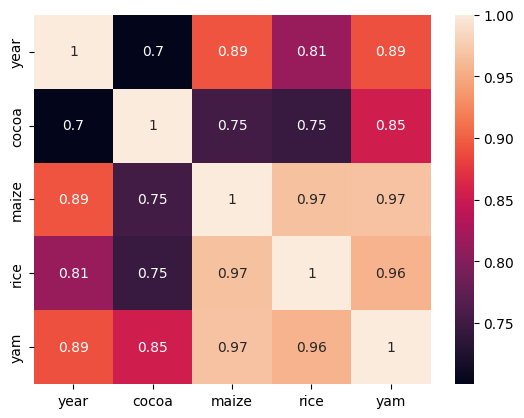

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.heatmap(prod_data.corr(), annot=True)
plt.figure(figsize=(10,10))

**Key Finding - Production Volume:** Maize, rice, and yam show near-perfect correlation (r > 0.95), indicating synchronized expansion. Cocoa correlates moderately with food crops (r = 0.75-0.85) and weakly with year (r = 0.70), suggesting distinct production dynamics and slower growth trajectory.

## Analysis 2: Crop Yield Correlations

**Objective:** Analyze yield per hectare improvements over time across all four crops.

**Research Question:** Have farming technology and practices improved yields equally across crops?

**Data:** `crops_yield.xlsx` - Yield in kg/hectare from FAOStat

In [ ]:
yield_data = pd.read_excel('/content/drive/MyDrive/crops_yield.xlsx')

In [ ]:
yield_data.head()

,year,cocoa,maize,rice,yam
0,1961,236.4,953.6,1104.7,7333.3
1,1962,237.8,928.3,1107.1,7333.3
2,1963,235.1,903.9,1004.3,6784.0
3,1964,314.1,853.7,1005.3,6742.7
4,1965,227.2,1206.2,1009.6,11105.3


In [ ]:
yield_data.describe()

,year,cocoa,maize,rice,yam
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1992.000000,350.401587,1436.453968,1771.180952,10801.947619
std,18.330303,111.376320,482.561448,851.054193,4502.151480
min,1961.000000,205.400000,430.000000,590.200000,5067.200000
25%,1976.500000,251.400000,1067.300000,1004.800000,5933.250000
50%,1992.000000,314.100000,1455.700000,1651.000000,11324.800000
75%,2007.500000,422.250000,1636.500000,2314.700000,13803.200000
max,2023.000000,568.200000,2783.800000,3954.100000,18653.400000


In [ ]:
yield_data.corr()

,year,cocoa,maize,rice,yam
year,1.000000,0.838846,0.848515,0.896692,0.836718
cocoa,0.838846,1.000000,0.870567,0.890217,0.833209
maize,0.848515,0.870567,1.000000,0.934292,0.882460
rice,0.896692,0.890217,0.934292,1.000000,0.916089
yam,0.836718,0.833209,0.882460,0.916089,1.000000


<Figure size 1000x1000 with 0 Axes>

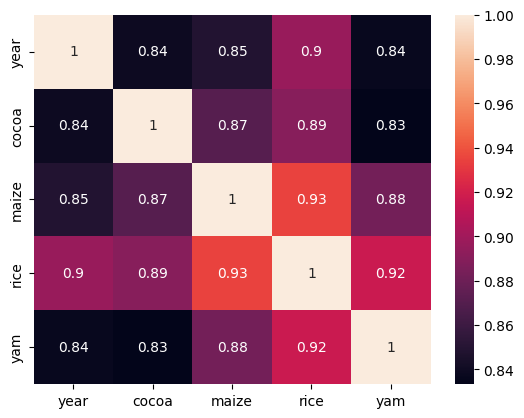

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.heatmap(yield_data.corr(), annot=True)
plt.figure(figsize=(10,10))

**Key Finding - Yield Trends:** All crops show strong positive correlation with year (r = 0.84-0.90), confirming consistent yield improvements over 63 years. Rice shows strongest gains (r = 0.90). Inter-crop correlations remain high (r > 0.83), indicating broad agricultural progress benefiting all crops equally.

## Analysis 3: Area Harvested Correlations

**Objective:** Examine land allocation trends and expansion patterns.

**Research Question:** How has agricultural land use changed over time? Is cocoa expanding its cultivated area?

**Data:** `area_harvested.xlsx` - Area in hectares from FAOStat

**Expected Insight:** This analysis reveals whether production growth comes from intensification (better yields) or extensification (more land).

In [ ]:
area_data = pd.read_excel('/content/drive/MyDrive/area_harvested.xlsx')

In [ ]:
area_data.head()

,year,cocoa,maize,rice,yam
0,1961,1756000,237000,27518,150000
1,1962,1800000,237000,28000,150000
2,1963,1820000,202340,32374,162000
3,1964,1848000,202340,42653,171000
4,1965,1830000,173277,32306,95000


In [ ]:
area_data.describe()

,year,cocoa,maize,rice,yam
count,63.000000,6.300000e+01,6.300000e+01,63.000000,63.000000
mean,1992.000000,1.344869e+06,6.367857e+05,122186.777778,250168.444444
std,18.330303,3.744071e+05,3.104166e+05,84570.747465,140599.711357
min,1961.000000,6.865310e+05,1.732770e+05,27518.000000,87000.000000
25%,1976.500000,1.112712e+06,3.807500e+05,66400.000000,133500.000000
50%,1992.000000,1.400000e+06,6.294000e+05,105000.000000,204400.000000
75%,2007.500000,1.600300e+06,8.632550e+05,134419.500000,355285.000000
max,2023.000000,2.000000e+06,1.300000e+06,370000.000000,582457.000000


In [ ]:
area_data.corr()

,year,cocoa,maize,rice,yam
year,1.000000,0.161854,0.956401,0.852566,0.906485
cocoa,0.161854,1.000000,0.187836,0.293009,0.389146
maize,0.956401,0.187836,1.000000,0.875557,0.947382
rice,0.852566,0.293009,0.875557,1.000000,0.905039
yam,0.906485,0.389146,0.947382,0.905039,1.000000


<Figure size 1000x1000 with 0 Axes>

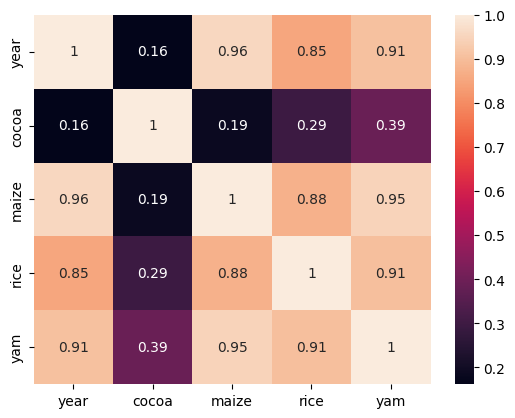

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.heatmap(area_data.corr(), annot=True)
plt.figure(figsize=(10,10))

**Findings - Area Harvested:**

| Crop | r with Year | Interpretation |
|------|-------------|----------------|
| Maize | 0.96 | Massive land expansion |
| Yam | 0.91 | Strong land expansion |
| Rice | 0.85 | Significant land expansion |
| Cocoa | 0.16 | Virtually NO expansion |

**Policy Implication:** While food crops (maize, rice, yam) have dramatically expanded farmland over 63 years, cocoa's cultivated area has remained stagnant. Ghana cannot increase cocoa production through land expansion but only through yield intensification. This reveals structural constraints: suitable cocoa land may be fully utilized, or farmers are shifting to more profitable food crops, and perhaps using land for other economic activites like mining.

## Analysis 4: GDP Contribution Correlations

**Objective:** Quantify relationships between agricultural output and national economic performance.

**Research Question:** How strongly does agriculture drive Ghana's overall GDP? What is cocoa's specific role within the agricultural sector?

**Data:** `gdp_contribution.xlsx` - GDP in Ghana Cedis from Ghana Statistical Service (2006-2024)

In [ ]:
gdp_data = pd.read_excel('/content/drive/MyDrive/gdp_contribution.xlsx')

In [ ]:
gdp_data.head()

,Year,Overall GDP,Agriculture GDP,Crops GDP,Cocoa GDP
0,2006,2.833430e+10,6.932713e+09,4.472782e+09,7.041957e+08
1,2007,3.408783e+10,8.057648e+09,5.191325e+09,7.615471e+08
2,2008,4.346536e+10,1.121639e+10,7.555433e+09,9.260339e+08
3,2009,5.221803e+10,1.425268e+10,9.884401e+09,1.145411e+09
4,2010,6.498256e+10,1.632298e+10,1.111692e+10,1.824214e+09


In [ ]:
gdp_data.corr()

,Year,Overall GDP,Agriculture GDP,Crops GDP,Cocoa GDP
Year,1.000000,0.868327,0.842068,0.824110,0.923697
Overall GDP,0.868327,1.000000,0.997826,0.995708,0.976002
Agriculture GDP,0.842068,0.997826,1.000000,0.999443,0.970068
Crops GDP,0.824110,0.995708,0.999443,1.000000,0.962151
Cocoa GDP,0.923697,0.976002,0.970068,0.962151,1.000000


**Correlation Summary:**
- Cocoa GDP vs Year: r = 0.92 (strong growth over time)
- Cocoa GDP vs Overall GDP: r = 0.98 (cocoa drives national economy)
- Agriculture GDP vs Overall GDP: r = 0.998 (agriculture IS the economy)
- All GDP measures highly intercorrelated (r > 0.96)

<Figure size 1000x1000 with 0 Axes>

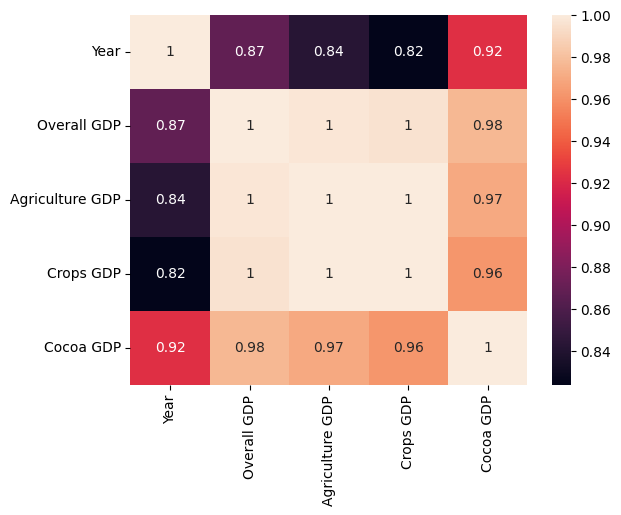

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.heatmap(gdp_data.corr(), annot=True)
plt.figure(figsize=(10,10))

## Analysis 5: OLS Regression Modeling

**Objective:** Quantify exact relationships and predictive power using linear regression.

**Models:**
1. **Agriculture GDP → Overall GDP** (How much does agriculture drive total economy?)
2. **Cocoa GDP → Agriculture GDP** (How dominant is cocoa within agriculture?)

**Method:** Ordinary Least Squares (OLS) regression with statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
# Overall GDP by Agriculture GDP
X = gdp_data['Agriculture GDP']
y = gdp_data['Overall GDP']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Overall GDP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3898.
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           1.59e-21
Time:                        00:43:22   Log-Likelihood:                -477.54
No. Observations:                  19   AIC:                             959.1
Df Residuals:                      17   BIC:                             961.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.706e+09   6.67e+09     

**Model 1 Results: Agriculture GDP → Overall GDP**

| Metric | Value | Interpretation |
|--------|-------|----------------|
| R² | **0.996** | Agriculture explains 99.6% of GDP variation |
| Coefficient | **4.89** | Every ₵1 agriculture → ₵4.89 overall GDP |
| p-value | <0.001 | Highly statistically significant |
| F-statistic | 3,898 | Extremely strong model fit |

**Insight:** The 4.89 multiplier effect is extraordinary. Agriculture generates massive economic activity through transport, processing, trade, and services.

In [ ]:
#Agriculture GDP by Cocoa GDP
X = gdp_data['Cocoa GDP']
y = gdp_data['Agriculture GDP']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Agriculture GDP   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     271.3
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           6.96e-12
Time:                        00:01:38   Log-Likelihood:                -472.14
No. Observations:                  19   AIC:                             948.3
Df Residuals:                      17   BIC:                             950.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.481e+10   5.76e+09     -2.569      0.0

## Summary: Key Insights & Findings

### Statistical Validation Complete

This notebook validated Power BI visual insights with rigorous statistical analysis. All findings confirmed with correlation coefficients and regression modeling.

---

### Key Findings

| Rank | Finding | Statistical Evidence | Business Implication |
|------|---------|---------------------|----------------------|
| 1 | **Cocoa Area Stagnation** | r = 0.16 with year (vs. r &gt; 0.85 for food crops) | Cannot expand production through land; must intensify yields |
| 2 | **Agriculture Dominates Economy** | R² = 0.996 for Ag→GDP; coefficient = 4.89 | Every ₵1 in agriculture generates ₵4.89 national GDP |
| 3 | **Cocoa Drives Agriculture** | R² = 0.941 for Cocoa→Ag GDP; coefficient = 13.86 | Cocoa IS Ghana's agricultural sector |
| 4 | **Synchronized Food Crop Growth** | Maize-Rice-Yam correlations r &gt; 0.95 | Shared conditions, policies, and climate responses |
| 5 | **Universal Yield Progress** | All crops r &gt; 0.84 with year | Technology adoption working across all sectors |

---

### Methodology Validation

| Technique | Purpose | Key Output |
|-----------|---------|------------|
| Pearson Correlation | Measure linear relationships | r-values 0.16 to 0.997 |
| OLS Regression | Quantify predictive relationships | R² = 0.941-0.996, significant coefficients |
| Heatmap Visualization | Pattern identification | Clear correlation clustering |

---

### Conclusion

**Agriculture is Ghana's economy. Cocoa is Ghana's agriculture.**

The statistical evidence overwhelmingly supports targeted investment in agricultural productivity enhancement, particularly cocoa yield intensification given land constraints. The 4.89 GDP multiplier makes agriculture the highest-ROI sector for national economic growth.

**Delivered to Amalitech Ghana:** 8 data-driven policy recommendations based on these findings (see presentation PDF).